In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import this

df = pd.read_csv("bangkok-air-quality.csv")

df = df.replace(' ', np.nan)
df = df.dropna(subset=[' pm25', ' pm10', 'date'])

df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(float)
df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']] = df[[' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']].astype(pd.Int32Dtype())

df['date'] = pd.to_datetime(df['date'])

df['dayofweek'] = df['date'].dt.dayofweek
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year

df['date'] = df['date'].astype(int)

df['date'] = (df['date'] - df['date'].min()) / (df['date'].max() - df['date'].min())
df['year'] = (df['year'] - df['year'].min()) / (df['year'].max() - df['year'].min())

df = df.sort_values(by='date')
df = df.reset_index(drop=True)


from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)

df = df.sort_index()

# encode
df_day_of_week = pd.DataFrame(encoder.fit_transform(df['dayofweek'].values.reshape(-1, 1)))
df_week = pd.DataFrame(encoder.fit_transform(df['week'].values.reshape(-1, 1)))
df_day = pd.DataFrame(encoder.fit_transform(df['day'].values.reshape(-1, 1)))
df_month = pd.DataFrame(encoder.fit_transform(df['month'].values.reshape(-1, 1)))

# index
df_day_of_week.index = df.index
df_week.index = df.index
df_day.index = df.index
df_month.index = df.index



df = df.drop(['dayofweek'], 1)
df = df.drop(['week'], 1)
df = df.drop(['day'], 1)
df = df.drop(['month'], 1)

df = df.drop([' o3'], axis=1)
df = df.drop([' no2'], axis=1)
df = df.drop([' so2'], axis=1)
df = df.drop([' co'], axis=1)


df_year = df['year']
df = df.drop(['year'], axis=1)
# df = pd.concat([df_day_of_week, df_week, df_day, df_month, year, df], axis=1)

# del #
df = pd.concat([df], axis=1)
########




# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(df.drop([' pm25', ' pm10'], axis=1), df[[' pm25', ' pm10']], test_size=0.3, random_state=42) 


# x_train = x_train.sort_index()
# x_test = x_test.sort_index()
# y_train = y_train.sort_index()
# y_test = y_test.sort_index()

df

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


/tmp/ipykernel_19667/3325084419.py:17: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df['week'] = df['date'].dt.week
/tmp/ipykernel_19667/3325084419.py:22: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  df['date'] = df['date'].astype(int)
/tmp/ipykernel_19667/3325084419.py:50: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['dayofweek'], 1)
/tmp/ipykernel_19667/3325084419.py:51: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df = df.drop(['week'], 1)
/tmp/ipykernel_19667/3325084419.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df =

,date,pm25,pm10
0,0.000000,61,19
1,0.000494,68,24
2,0.000989,60,20
3,0.001483,68,25
4,0.001977,70,26
...,...,...,...
2003,0.998023,145,44
2004,0.998517,95,41
2005,0.999011,83,40
2006,0.999506,80,48


In [2]:
import pandas as pd
from collections import deque
import random
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, BatchNormalization, Flatten
from keras.callbacks import TensorBoard
from keras.callbacks import ModelCheckpoint, ModelCheckpoint
import time
from sklearn import preprocessing
from collections import deque
from sklearn.model_selection import train_test_split

In [3]:
# preprocessing

SEQ_LEN = 90

sequential_data = []
prev_days = deque(maxlen=SEQ_LEN)

for i in df.values:
    prev_days.append([n for n in i[:-2]])
    if len(prev_days) == SEQ_LEN:
        sequential_data.append([np.array(prev_days), i[-2:]])

X = []
y = []
for x_val, y_val in sequential_data:
    X.append(x_val)
    y.append(y_val)

x_train, y_train = X[:int(len(X)*0.9)], y[:int(len(y)*0.9)]
x_train, y_train = np.array(x_train).astype('float32'), np.array(y_train).astype('float32')

x_test, y_test= X[int(len(X)*0.9):], y[int(len(y)*0.9):]
x_test, y_test = np.array(x_test).astype('float32'), np.array(y_test).astype('float32')


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1727, 90, 1), (1727, 2), (192, 90, 1), (192, 2))

In [4]:
model = Sequential()

LSTM_RETURN_LAYER = 2
LSTM_RETURN_SIZE = 300
LSTM_NORMAL_LAYER = 1
LSTM_NORMAL_SIZE = 300
DENSE_LAYER = 0
DENSE_SIZE = 60
DROPOUT_SIZE = 0.3
BATCH_SIZE = 24
EPOCH = 960

for i in range(LSTM_RETURN_LAYER):
    model.add(LSTM(LSTM_RETURN_SIZE, input_shape=(x_train.shape[1:]), return_sequences=True))
    model.add(Dropout(DROPOUT_SIZE))
    model.add(BatchNormalization())

for i in range(LSTM_NORMAL_LAYER):
    model.add(LSTM(LSTM_NORMAL_SIZE))
    model.add(BatchNormalization())


for i in range(DENSE_LAYER):
    model.add(Dense(DENSE_SIZE, activation='relu'))

# output layer
model.add(Dense(2))

opt = tf.keras.optimizers.Adam(learning_rate=0.01, decay=0.001)

model.compile(
    loss='mse',
    optimizer=opt
)

name1 = f'WeatherForcast-{LSTM_RETURN_LAYER}-LSTM_RETURN_LAYER-{LSTM_RETURN_SIZE}-LSTM_RETURN_SIZE'
name2 = f'-{LSTM_NORMAL_LAYER}-LTSM_NORMAL_LAYER-{LSTM_NORMAL_SIZE}-LSTM_NORMAL_SIZE-{DENSE_LAYER}-DENSE_LAYER'
name3 = f'-{DENSE_SIZE}-DENSE_SIZE-{DROPOUT_SIZE}-DROPOUT_SIZE-{BATCH_SIZE}-BATCH_SIZE-{EPOCH}-EPOCH'
NAME  = name1 + name2 + name3

tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))



history = model.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCH,
    validation_data=(x_test, y_test), 
    verbose=2,
    shuffle=True,
)

2022-03-18 09:27:42.198002: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 09:27:42.263900: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 09:27:42.264884: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-18 09:27:42.267259: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Epoch 1/960


2022-03-18 09:27:47.776025: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8100


72/72 - 7s - loss: 2531.5901 - val_loss: 507.9154 - 7s/epoch - 99ms/step
Epoch 2/960
72/72 - 1s - loss: 660.8531 - val_loss: 499.9675 - 1s/epoch - 21ms/step
Epoch 3/960
72/72 - 2s - loss: 659.4147 - val_loss: 504.0717 - 2s/epoch - 22ms/step
Epoch 4/960
72/72 - 2s - loss: 661.9085 - val_loss: 565.5624 - 2s/epoch - 21ms/step
Epoch 5/960
72/72 - 2s - loss: 656.6092 - val_loss: 600.4869 - 2s/epoch - 21ms/step
Epoch 6/960
72/72 - 2s - loss: 657.0958 - val_loss: 639.8368 - 2s/epoch - 22ms/step
Epoch 7/960
72/72 - 1s - loss: 659.2078 - val_loss: 503.3753 - 1s/epoch - 21ms/step
Epoch 8/960
72/72 - 2s - loss: 660.0415 - val_loss: 531.3497 - 2s/epoch - 22ms/step
Epoch 9/960
72/72 - 2s - loss: 662.3541 - val_loss: 512.3301 - 2s/epoch - 21ms/step
Epoch 10/960
72/72 - 2s - loss: 661.1538 - val_loss: 574.7625 - 2s/epoch - 21ms/step
Epoch 11/960
72/72 - 2s - loss: 664.5048 - val_loss: 533.4802 - 2s/epoch - 22ms/step
Epoch 12/960
72/72 - 2s - loss: 664.5796 - val_loss: 503.7314 - 2s/epoch - 23ms/step


In [5]:
# Score model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score)

Test loss: 1046.9083251953125


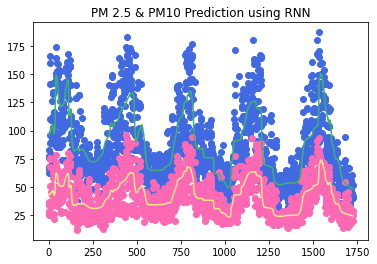

In [6]:
prediction = model.predict(x_train)
prediction = np.array(prediction)


plt.scatter([i for i in range(len(prediction[:,0]))], y_train[:,0], color='royalblue')
plt.plot([i for i in range(len(prediction[:,0]))], prediction[:,0], color='mediumseagreen')

plt.scatter([i for i in range(len(prediction[:,0]))], y_train[:,1], color='hotpink')
plt.plot([i for i in range(len(prediction[:,0]))], prediction[:,1], color='khaki')

plt.title('PM 2.5 & PM10 Prediction using RNN')
plt.show()

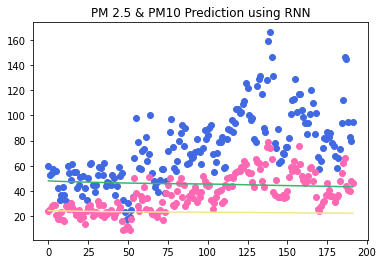

In [7]:
prediction = model.predict(x_test)
prediction = np.array(prediction)


plt.scatter([i for i in range(len(prediction[:,0]))], y_test[:,0], color='royalblue')
plt.plot([i for i in range(len(prediction[:,0]))], prediction[:,0], color='mediumseagreen')

plt.scatter([i for i in range(len(prediction[:,0]))], y_test[:,1], color='hotpink')
plt.plot([i for i in range(len(prediction[:,0]))], prediction[:,1], color='khaki')

plt.title('PM 2.5 & PM10 Prediction using RNN')
plt.show()